<a href="https://colab.research.google.com/github/tejaspradhan/Face-Generation-from-Textual-Features-using-GANs/blob/main/Stacked_GAN_T2F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/NVlabs/stylegan2.git

fatal: destination path 'stylegan2' already exists and is not an empty directory.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import pickle
sys.path.insert(0, '/content/stylegan2')
import pretrained_networks
from dnnlib import tflib as tflib
import numpy as np
import PIL.Image
import dnnlib
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten
%matplotlib inline

In [18]:
# loading pretrained network
with open('/content/drive/MyDrive/ffhq-256-config-e-003810.pkl','rb') as f:
  G, D, Gs = pickle.load(f)
  
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
truncation_psi=1.0
Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [24]:
# generate random image using stylegan pretrained network
seed =6000
print('Generating image for seed %d...' % (seed))
rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:])
print("Noise Vars: ",noise_vars)
print("Input size: ",*Gs.input_shape[1:])
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) 
images = Gs.run(z, None, **Gs_kwargs)
img=PIL.Image.fromarray(images[0], 'RGB')

Generating image for seed 6000...
Noise Vars:  [<tf.Variable 'G_synthesis_1/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise10:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise11:0' shape=(1, 1, 256, 256) dtype=float32_ref>, <t

In [23]:
img.size

(256, 256)

## Custom Methods

In [25]:
def stylegan_generate_image(latent_vector):
  seed = np.random.randint(10000)
  print('Generating image for seed %d...' % (seed))
  rnd = np.random.RandomState(seed)
  z = np.array([latent_vector])
  print("Noise Vars: ",noise_vars)
  print("Input size: ",*Gs.input_shape[1:])
  # print("Input: \n",latent_vector)
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) 
  images = Gs.run(z, None, **Gs_kwargs)
  img=PIL.Image.fromarray(images[0], 'RGB')
  return np.array(img)

In [ ]:
def resize_image(img):
  mywidth = 1024
  wpercent = (mywidth/float(img.size[0]))
  hsize = int((float(img.size[1])*float(wpercent)))
  img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
  return img

In [ ]:
def reconstruction_loss(real_images, generated_images):
  loss = []
  for real_image, fake_image in zip(real_images,generated_images):
    loss.append(0.5)
  return tf.convert_to_tensor(loss,dtype=tf.float32)

## Loading Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d timkao0612/30000resized-celeba

In [ ]:
!unzip "/content/celeba-dataset.zip" -d "/content/data"

In [26]:
embeddings = np.load('/content/embeddings_37k.npz')['arr_0']

Generating image for seed 726...
Noise Vars:  [<tf.Variable 'G_synthesis_1/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise10:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise11:0' shape=(1, 1, 256, 256) dtype=float32_ref>, <tf

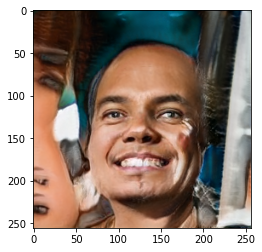

In [34]:
img =stylegan_generate_image(embeddings[9])
imshow(img)
print(img.shape)

In [ ]:
face_data = pd.read_csv('/content/face_features_preprocessed.csv')

In [ ]:
face_ids=face_data['image_id']

## Training 

In [ ]:
r1 = Image.open('/content/data/img_align_celeba/img_align_celeba/' + face_ids[0])
r2 = Image.open('/content/data/img_align_celeba/img_align_celeba/' + face_ids[1])
f1 = np.array(stylegan_generate_image(embeddings[0]))
f2 = np.array(stylegan_generate_image(embeddings[1]))

In [ ]:
real_images.shape

In [ ]:
fake_images.shape

In [ ]:
r1_resized = np.array(resize_image(r1))

In [ ]:
r1_resized.shape

In [ ]:
#face_ids => image_ids
#embeddings => text_embeddings

In [ ]:
BATCH_SIZE =32

In [ ]:
def get_images(face_ids):
  images=[]
  for id in face_ids:
    print(id)
    img = cv2.imread('/content/data/img_align_celeba/img_align_celeba/'+id)
    images.append(img)
  images= np.array(images)
  return images

In [ ]:
train_images = []
train_embeddings = []
index = 0
while(index< BATCH_SIZE*4):
    images_batch = get_images(face_ids[index:index+BATCH_SIZE])
    embeddings_batch = embeddings[index:index+BATCH_SIZE]
    train_images.append(images_batch)
    train_embeddings.append(embeddings_batch)
    index+=BATCH_SIZE
    print("BATCH DONE")
train_images = np.array(train_images)
train_embeddings = np.array(train_embeddings)

000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
000011.jpg
000012.jpg
000013.jpg
000014.jpg
000015.jpg
000016.jpg
000017.jpg
000018.jpg
000019.jpg
000020.jpg
000021.jpg
000022.jpg
000023.jpg
000024.jpg
000025.jpg
000026.jpg
000027.jpg
000028.jpg
000029.jpg
000030.jpg
000031.jpg
000032.jpg
BATCH DONE
000033.jpg
000034.jpg
000035.jpg
000036.jpg
000037.jpg
000038.jpg
000039.jpg
000040.jpg
000041.jpg
000042.jpg
000043.jpg
000044.jpg
000045.jpg
000046.jpg
000047.jpg
000048.jpg
000049.jpg
000050.jpg
000051.jpg
000052.jpg
000053.jpg
000054.jpg
000055.jpg
000056.jpg
000057.jpg
000058.jpg
000059.jpg
000060.jpg
000061.jpg
000062.jpg
000063.jpg
000064.jpg
BATCH DONE
000065.jpg
000066.jpg
000067.jpg
000068.jpg
000069.jpg
000070.jpg
000071.jpg
000072.jpg
000073.jpg
000074.jpg
000075.jpg
000076.jpg
000077.jpg
000078.jpg
000079.jpg
000080.jpg
000081.jpg
000082.jpg
000083.jpg
000084.jpg
000085.jpg
000086.jpg
000087.jpg
000088.jpg
000089.jpg

In [ ]:
print(train_images.shape) 
print(train_embeddings.shape)

(4, 32, 218, 178, 3)
(4, 32, 512, 1)


## Defining Intermediate Trainable Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv1D(64,3, input_shape =(512,1)))
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [ ]:
embeddings = embeddings.reshape(embeddings.shape[0],512,1)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 510, 64)           256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 255, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 16320)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               8356352   
Total params: 8,356,608
Trainable params: 8,356,608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# example
model(np.array([embeddings[0]]))

<tf.Tensor 'sequential_7/dense_5/Relu:0' shape=(1, 512) dtype=float32>

In [ ]:
def train(train_images, train_embeddings, epochs):
  for i in range(epochs):
    for train_image_batch, train_embedding_batch in zip(train_images,train_embeddings):
      train_step(train_image_batch, train_embedding_batch)

In [ ]:
def train_step(image_batch,embedding_batch):
  # batchwise training 
  with tf.GradientTape() as tape:
        # Create latent vectors
        latent_vector_batch = model.predict(embedding_batch)

        # generate faces using stylegan
        generated_images = []
        for vector in latent_vector_batch:
          generated_images.append(stylegan_generate_image(vector))
        generated_images = np.array(generated_images)

        # calculate individual losses
        loss = reconstruction_loss(image_batch,generated_images)

        # Calculate gradients of loss functions
        gradients= tape.gradient(loss,model.trainable_variables)
        
        # Optimise
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        
        print("Generator Loss: ",np.mean(gen_loss))

In [ ]:
train(train_images, train_embeddings,1)

Generating image for seed 2978...
Noise Vars:  [<tf.Variable 'G_synthesis_1/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise10:0' shape=(1, 1, 128, 128) dtype=float32_ref>, <tf.Variable 'G_synthesis_1/noise11:0' shape=(1, 1, 256, 256) dtype=float32_ref>, <t

ValueError: ignored

## TODO
1. loss change 
2. dataset change